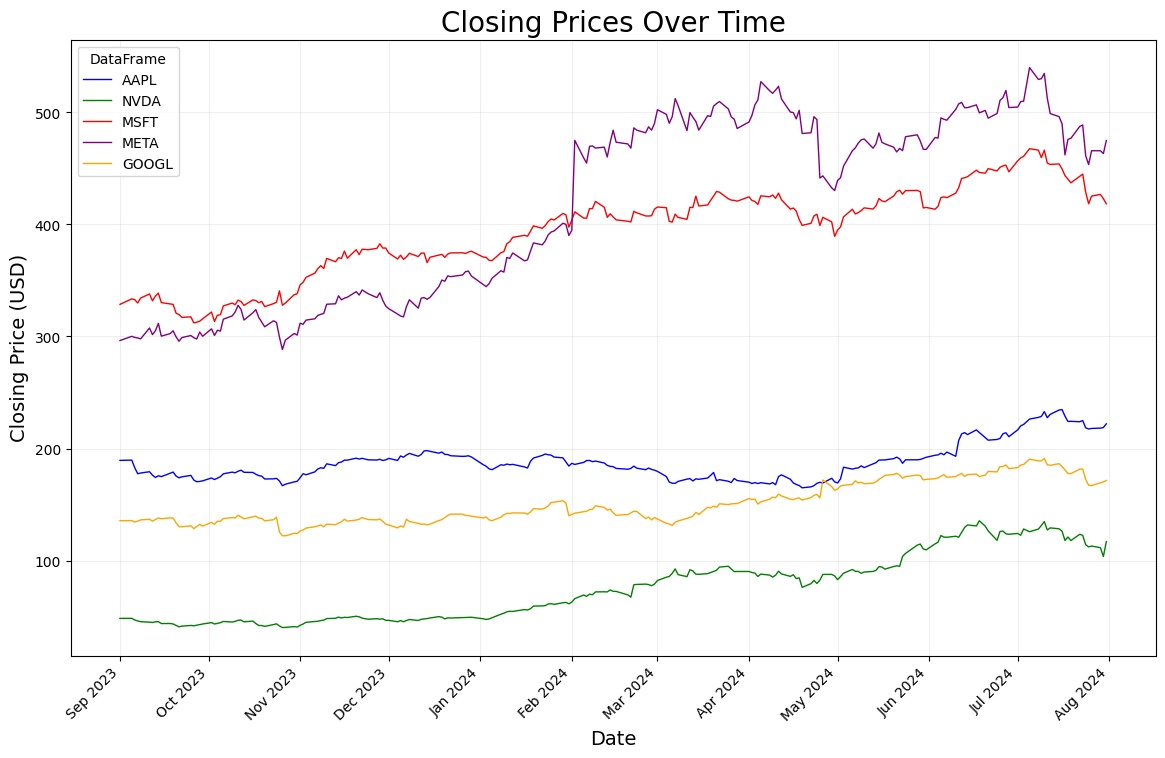

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df1 = pd.read_csv('data/prices/csvs/aapl.csv')
df2 = pd.read_csv('data/prices/csvs/nvda.csv')
df3 = pd.read_csv('data/prices/csvs/msft.csv')
df4 = pd.read_csv('data/prices/csvs/meta.csv')
df5 = pd.read_csv('data/prices/csvs/googl.csv')

dfs = [df1, df2, df3, df4, df5]
for df in dfs:
    df['Exchange Date'] = pd.to_datetime(df['Exchange Date'], format='%d-%b-%Y')
    df.sort_values('Exchange Date', inplace=True)

colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['AAPL', 'NVDA', 'MSFT', 'META', 'GOOGL']

plt.figure(figsize=(14, 8))

for i, df in enumerate(dfs):
    plt.plot(df['Exchange Date'], df['Close'], color=colors[i], linewidth=1, label=labels[i])

plt.title('Closing Prices Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)

plt.grid(True, linestyle='-', alpha=0.2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, ha='right')

plt.legend(title='DataFrame')

plt.show()

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object


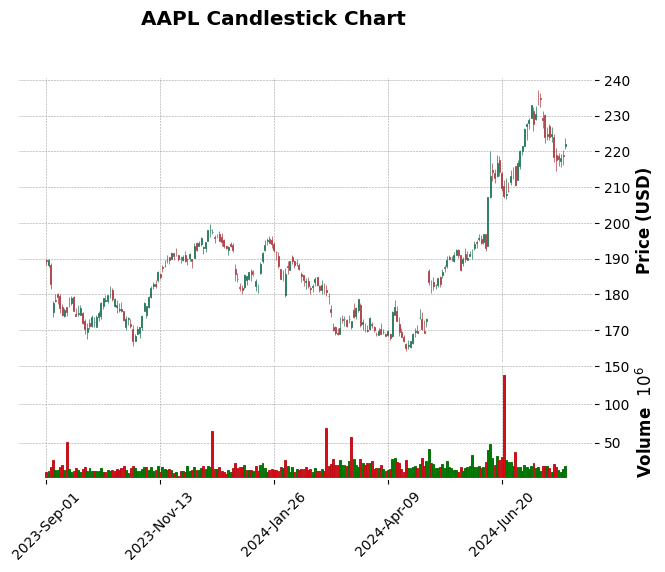

In [8]:
import pandas as pd
import mplfinance as mpf

df = pd.read_csv('data/prices/csvs/aapl.csv')

df['Exchange Date'] = pd.to_datetime(df['Exchange Date'], format='%d-%b-%Y')
df.sort_values('Exchange Date', inplace=True)
df.set_index('Exchange Date', inplace=True)

df.rename(columns={
    'Open Price': 'Open',
    'High Price': 'High',
    'Low Price': 'Low',
    'Close Price': 'Close',
    'Traded Quantity': 'Volume'
}, inplace=True)

df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df.dropna(inplace=True)

print(df.dtypes)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dropna(subset=['Volume'], inplace=True)

mpf.plot(
    df,
    type='candle',
    style='charles',
    title='AAPL Candlestick Chart',
    ylabel='Price (USD)',
    volume=True,
    show_nontrading=False
)
